<a href="https://colab.research.google.com/github/cleogrs/analytics/blob/main/CLEO_GOMES_DA_ROCHA_SANTOS_Exercicios_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Importando dataframe

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import binom
from scipy.special import comb
!pip install pydataset --quiet
from pydataset import data
df = pd.read_csv('/content/drive/MyDrive/populacao_brasileira.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [ ]:
# @title 1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.

#frequencia absoluta dos níveis de proficiência em inglês
ingles = (pd.get_dummies(df['nível de proficiência em inglês'])).sum()

#probabilidade de não ser fluente em inglês = 1 - probabilidade de ser fluente
pb_naofluente = 1 - (ingles['Avançado']/len(df))


print('Probabilidade de escolher uma pessoa aleatória e ela não ser fluente em inglês: ', pb_naofluente)

Probabilidade de escolher uma pessoa aleatória e ela não ser fluente em inglês:  0.656


In [ ]:
# @title 2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

#frequencia absoluta dos estados
estados = (pd.get_dummies(df['estado'])).sum()

#probabilidade de ser do estado de alagoas ou pará
pb_alpa = (estados['PA'] + estados['AL']) / len(df)

#frequencia absoluta dos que tem renda superior a 5 mil
renda5k = (df['renda'] > 5000).sum()

#probabilidade de ter renda superior a 5 mil
pb_5k = renda5k / len(df)

#probabilidade de ter renda superior a 5 mil
pb_alpa_5k = (pb_5k * pb_alpa) / pb_alpa

print('Probabilidade de escolher uma pessoa aleatória e ela for de Alagoas ou do Pará e ter uma renda superior a 5 mil: ', pb_alpa_5k)

Probabilidade de escolher uma pessoa aleatória e ela for de Alagoas ou do Pará e ter uma renda superior a 5 mil:  0.032


In [ ]:
# @title 3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

#frequencia absoluta do estado do amazonas
am = df[df['estado'] == 'AM']

#frequencia absoluta dos níveis de escolaridade
am_escolaridade = (pd.get_dummies(am['escolaridade'])).sum()

# probabilidade de se ter ensino superior no amazonas
pb_am_superior = (am_escolaridade['Superior'] + am_escolaridade['Pós-graduação'])/len(am)

# probabilidade de somente a quinta pessoa ter ensino superior
pb_am_superior5 = pb_am_superior * ((1 - pb_am_superior) ** 4)


print('Probabilidade da quinta pessoa amazonense ter ensino superior: ', pb_am_superior5)

Probabilidade da quinta pessoa amazonense ter ensino superior:  0.022135890467222828


In [ ]:
# @title 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

#definindo intervalo de renda de a cada 1500 reais
intervalos_renda = np.arange(0, df['renda'].max() + 1500, 1500)
df['faixa de renda'] = pd.cut(df['renda'], bins=intervalos_renda)
freq_renda = df['faixa de renda'].value_counts()

# Calculando a faixa de renda com maior densidade
maior_faixa = (freq_renda / len(df)).idxmax()

print('A renda de uma pessoa brasileira está em sua maioria na faixa de ', maior_faixa, ' reais.')

A renda de uma pessoa brasileira está em sua maioria na faixa de  (3000.0, 4500.0]  reais.


Média: 3082.5371800000003 
Variância: 993156.2281676169 



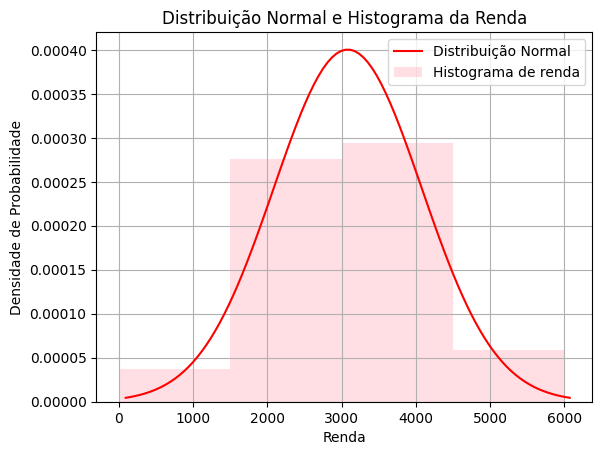

In [ ]:
# @title 5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

#média de renda
media_renda = df['renda'].sum() / len(df)

#soma dos quadrados das diferenças
sumdif = sum((x - media_renda) ** 2 for x in df['renda'])

#variância e desvio padrão de renda
var_renda = sumdif / (len(df) - 1)
dp_renda = var_renda ** 0.5

#função de densidade de probabilidade
#x = np.linspace(0, df['renda'].max(), 100)
#pdf_renda = norm.pdf(x, loc=media_renda, scale=dp_renda)
#pdf_renda

print('Média:', media_renda, '\nVariância:', var_renda, '\n')

#plotando o gráfico de distribuição normal
x = np.linspace(media_renda - 3*dp_renda, media_renda + 3*dp_renda, 100)
y = norm.pdf(x, media_renda, dp_renda)


plt.plot(x, y, 'r-', label='Distribuição Normal')
plt.hist(df['renda'], bins=intervalos_renda, density=True, alpha=0.5, color='pink', label='Histograma de renda')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal e Histograma da Renda')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# @title 6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

#frequencia absoluta das escolaridades
escolaridade = (pd.get_dummies(df['escolaridade'])).sum()

#probabilidade de pós graduação
pb_pos = escolaridade['Pós-graduação'] / len(df)

n = 1000000  # Tamanho população
k = 243000   # Número de pessoas com pós-graduação desejadas

# Calcular a probabilidade usando a distribuição binomial
binomial_pos = binom.pmf(k, n, pb_pos)

print('Probabilidade de de encontrar 243 mil pessoas com pós: ', binomial_pos)

Probabilidade de de encontrar 243 mil pessoas com pós:  1.1104854289794913e-119


In [ ]:
# @title 7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

#densidade acumulada da escolaridade
densidade = escolaridade / escolaridade.sum()
densidade.cumsum()

Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
dtype: float64

In [ ]:
# @title 8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

#probabilidade de ter inglês intermediário
pb_intermediario = ingles['Intermediário'] / len(df)

#margem de erro amostral
z = norm.ppf((1 + 0.95) / 2)
margem_ing_inter = z * np.sqrt((pb_intermediario * (1 - pb_intermediario)) / len(df))

print('Margem de erro amostral da proporção de pessoas com inglês intermediário', margem_ing_inter)

Margem de erro amostral da proporção de pessoas com inglês intermediário 0.029121068108804226


In [ ]:
# @title 9. Calcule a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

#definindo o corte de renda mil reais superior a média
renda_corte = (df['renda'].mean()) + 1000

# frequência absoluta de pessoas com renda mil reais superior a média
freq_renda_cut = len(df.loc[df['renda'] > renda_corte])

#probabilidade de encontrar uma pessoa com renda mil reais superior a média
pb_renda_cut = 1 - stats.norm.cdf(renda_corte, loc=media_renda, scale=dp_renda)

#probabilidade de encontrar 60 pessoas com renda mil reais superior a média
binomial_renda = binom.pmf(60, len(df), pb_renda_cut)

print('Probabilidade de encontrar 60 pessoas com renda mil reais superior a média: ', binomial_renda)

Probabilidade de encontrar 60 pessoas com renda mil reais superior a média:  1.1597038406783114e-21


In [ ]:
# @title 10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

#probabilidade de selecionar alguém do sudeste
pb_sudeste = (estados['RJ'] + estados['SP'] + estados['ES'] + estados['MG']).sum() / len(df)

#probabilidade de selecionar homem
sexo = pd.get_dummies(df['sexo'])
pb_homem = (sexo['M'].sum()) / len(df)

#probabilidade de selecionar alguém do ensino fundamental
pb_fundamental = escolaridade['Fundamental'] / len(df)

#probabilidade de selecionar alguem com renda maior que 2 mil
freq_renda_mais2k = len(df.loc[df['renda'] > 2000])
pb_renda_mais2k = freq_renda_mais2k / len(df)

#probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês
pb_final = pb_sudeste * pb_homem * pb_fundamental * pb_renda_mais2k

print('Probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês: ', pb_final)

Probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês:  0.017414252856
